<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np

np.random.normal(loc=5, scale=2, size=10)


array([2.86137936, 7.34798799, 4.71265265, 4.20249507, 3.09335711,
       4.77072654, 6.93451636, 4.28933634, 2.21153039, 4.60201971])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

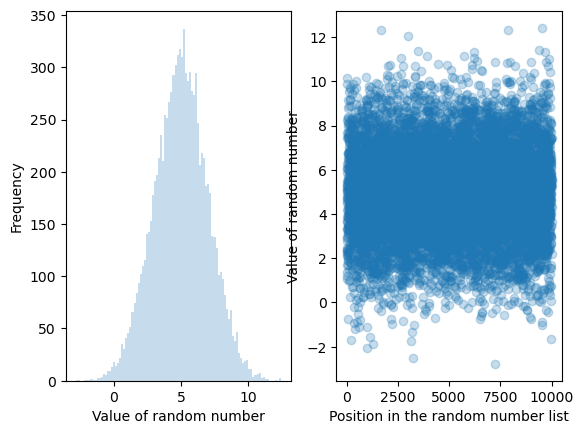

In [5]:
from matplotlib import pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")


### 1.3 68%?

In [6]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')


% of points between 1 std.dev. from the mean: 67.56%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [7]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x



In [8]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

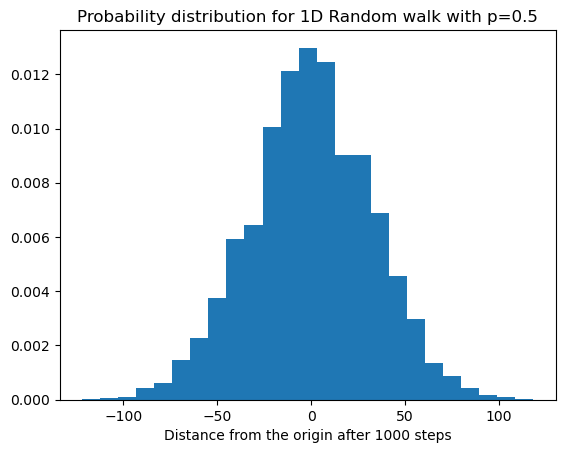

In [9]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

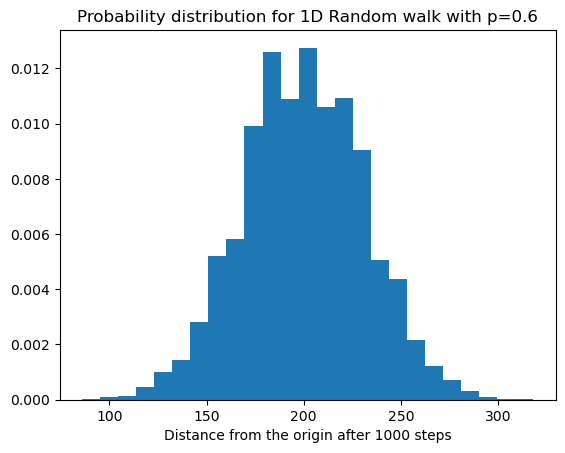

In [10]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

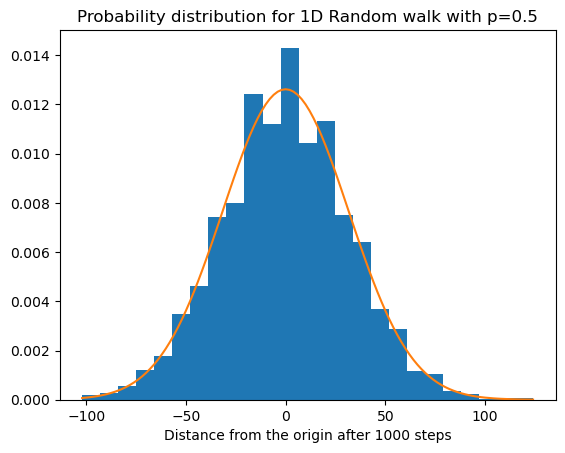

In [13]:
prob_right=p

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')


def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [12]:
# can randomly create points using NumPy's PRNG #


### 2.2 A poor but intuitive solution

In [15]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi


3.14308

### 2.3 A better solution

In [11]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                
4 * (N_green / N_total)


3.140028

### 2.4 A smarter solution

In [12]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)


3.143896

## Exercise 1 :  Vital Stats of Random π

In [75]:
import numpy.random as rnd


n=10000

def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    n_green=np.sum((x**2+y**2) <= 1)
    results = 4 * (n_green / n)
    return results 

list=[]

for i in range (100):
    y = estimate_pi(n)
    list.append(y)

print(list) 





[3.166, 3.1064, 3.1076, 3.1752, 3.138, 3.1308, 3.168, 3.13, 3.1444, 3.1532, 3.1576, 3.1488, 3.1656, 3.144, 3.158, 3.112, 3.1384, 3.1272, 3.1368, 3.1496, 3.1272, 3.1164, 3.1588, 3.1316, 3.1328, 3.1568, 3.1348, 3.1584, 3.1464, 3.1708, 3.144, 3.1588, 3.1084, 3.1528, 3.1232, 3.1208, 3.1524, 3.1252, 3.1368, 3.1772, 3.1136, 3.1336, 3.1296, 3.1016, 3.1508, 3.1356, 3.1668, 3.116, 3.1548, 3.17, 3.1456, 3.1692, 3.128, 3.1564, 3.1536, 3.158, 3.1588, 3.1376, 3.1584, 3.1372, 3.1652, 3.1568, 3.1852, 3.1524, 3.1404, 3.158, 3.1184, 3.1284, 3.128, 3.1572, 3.1244, 3.1484, 3.1512, 3.166, 3.1364, 3.1572, 3.1304, 3.1416, 3.14, 3.1548, 3.1508, 3.1512, 3.1208, 3.1544, 3.13, 3.1464, 3.168, 3.1572, 3.1464, 3.124, 3.1552, 3.1488, 3.162, 3.142, 3.146, 3.1608, 3.1624, 3.136, 3.1268, 3.1412]


In [76]:
np.average(list)

3.1443720000000006

In [77]:
np.std(list)

0.017452954363087046

In [81]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    n_green=np.sum((x**2+y**2) <= 1)
    results = 4 * (n_green / n)
    return results
print(estimate_pi(1000))

3.172


In [84]:
list_n = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]

list_mean=[]
list_sd=[]


for values in list_n:
    w = [estimate_pi(n=values) for i in range(100)]
    list_mean.append(np.average(w))
    list_sd.append(np.std(w))
    
print(list_mean)
print(list_sd)
    

[3.1479999999999997, 3.1431999999999993, 3.1448, 3.141504, 3.1413456000000006, 3.1413667199999997]
[0.4984937311541642, 0.17354469165030662, 0.05294223266920279, 0.015379791416010806, 0.004785864252149261, 0.00149682179353455]


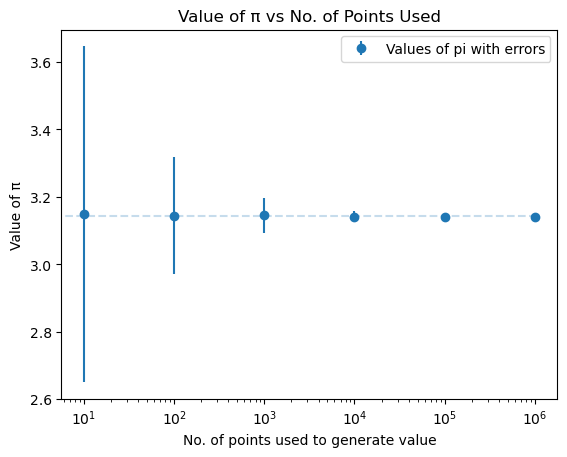

In [93]:
from matplotlib import pyplot as plt
import math

x = list_n
y = list_mean
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of π')
plt.title('Value of π vs No. of Points Used')
xy = plt.errorbar(x, y, yerr=list_sd, fmt='o',label="Values of pi with errors")
plt.hlines(np.pi, 0, x[-1], ls = 'dashed', label = 'Real π', alpha= 0.25)
plt.xscale('log')

plt.legend(handles=[xy],loc='upper right')

plt.show()

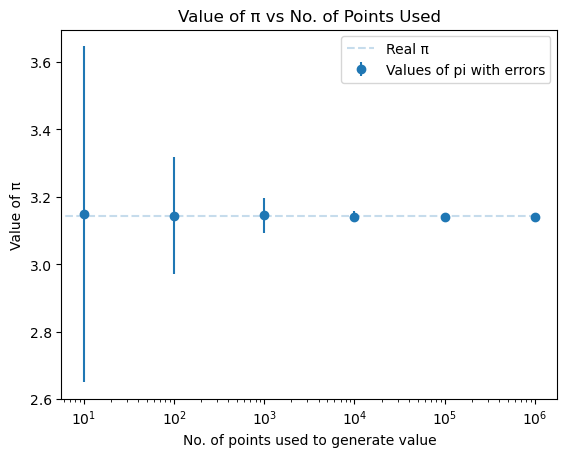

In [94]:
from matplotlib import pyplot as plt
import math

x = list_n
y = list_mean
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of π')
plt.title('Value of π vs No. of Points Used')
plt.errorbar(x, y, yerr=list_sd, fmt='o',label="Values of pi with errors")
plt.hlines(np.pi, 0, x[-1], ls = 'dashed', label = 'Real π', alpha= 0.25)
plt.xscale('log')

plt.legend(loc='upper right')

plt.show()